## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data exploration


In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Splitting into training and testing sets


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.25,
                                                    random_state=42, stratify=df['Potability'])

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2457 entries, 2117 to 2353
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2091 non-null   float64
 1   Hardness         2457 non-null   float64
 2   Solids           2457 non-null   float64
 3   Chloramines      2457 non-null   float64
 4   Sulfate          1866 non-null   float64
 5   Conductivity     2457 non-null   float64
 6   Organic_carbon   2457 non-null   float64
 7   Trihalomethanes  2332 non-null   float64
 8   Turbidity        2457 non-null   float64
dtypes: float64(9)
memory usage: 192.0 KB


In [5]:
X_train.isnull().sum()

ph                 366
Hardness             0
Solids               0
Chloramines          0
Sulfate            591
Conductivity         0
Organic_carbon       0
Trihalomethanes    125
Turbidity            0
dtype: int64

In [6]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2091.0,7.091610,1.590348,0.227499,6.097168,7.035037,8.081282,13.541240
Hardness,2457.0,196.585569,32.639055,47.432000,177.347214,196.903247,216.454108,323.124000
Solids,2457.0,21870.632668,8810.330920,320.942611,15423.387278,20834.294278,27062.065889,61227.196008
Chloramines,2457.0,7.099062,1.597196,1.683993,6.105708,7.106043,8.111958,13.043806
Sulfate,1866.0,334.257292,41.631051,129.000000,307.803253,333.173254,360.690426,481.030642
Conductivity,2457.0,428.207073,81.302529,181.483754,367.044379,424.966995,485.098483,753.342620
Organic_carbon,2457.0,14.274467,3.270625,4.371899,12.082169,14.200557,16.516232,27.006707
Trihalomethanes,2332.0,66.087182,16.184340,0.738000,55.394256,66.398233,77.136960,124.000000
Turbidity,2457.0,3.971487,0.783995,1.492207,3.438280,3.965647,4.493747,6.739000


## Creating Pipelines


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

forest_clf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

forest_clf.set_output(transform='pandas')

forest_clf

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [16]:
forest_clf.fit(X_train, y_train)
forest_clf.score(X_test, y_test)

0.6691086691086691

## Using Classification metrics

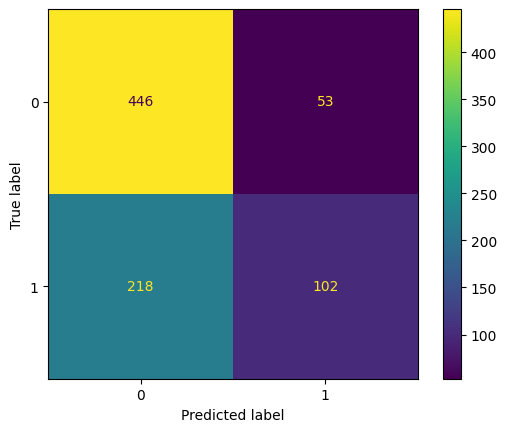

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = forest_clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [18]:
from sklearn.metrics import precision_score, recall_score

print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))

precision 0.6580645161290323
recall 0.31875
